<a href="https://colab.research.google.com/github/mvbaracho/DataMinning/blob/main/Previs%C3%A3o/ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP

In [ ]:
#BIBLIOTECAS
#!pip install pycaret
#!pip install scikit-learn

import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

import numpy as np  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


from numpy import std
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

%matplotlib inline


In [ ]:
# IMPORTAÇÃO DB
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"138bRT5WPXfCdZj2fS_sMars4NlaQr75y"})
downloaded.GetContentFile('Sales2.csv')

# CARREGANDO DB
df = pd.read_csv('Sales2.csv', sep=';', na_values='?')

# Database SETUP

In [ ]:
# Trata a coluna Timestamp
df['Timestamp']= pd.to_datetime(df['Timestamp'],format='%Y-%m-%d')

# Obtém a coluna Price(Somatório das vendas do dia)
df_class2 = df[['Timestamp', 'Price']].groupby(pd.Grouper(key='Timestamp', freq='1D')).sum()['Price']

# A partir daqui, um novo dataframe será gerado(df2) para trabalharmos
df2 = pd.DataFrame(df_class2)

df2['Price']

Timestamp
2018-05-16       0.15
2018-05-17     156.34
2018-05-18     370.60
2018-05-19     239.73
2018-05-20     118.32
               ...   
2021-07-11    1814.46
2021-07-12    4651.45
2021-07-13    4578.15
2021-07-14    4059.69
2021-07-15     343.25
Freq: D, Name: Price, Length: 1157, dtype: float64

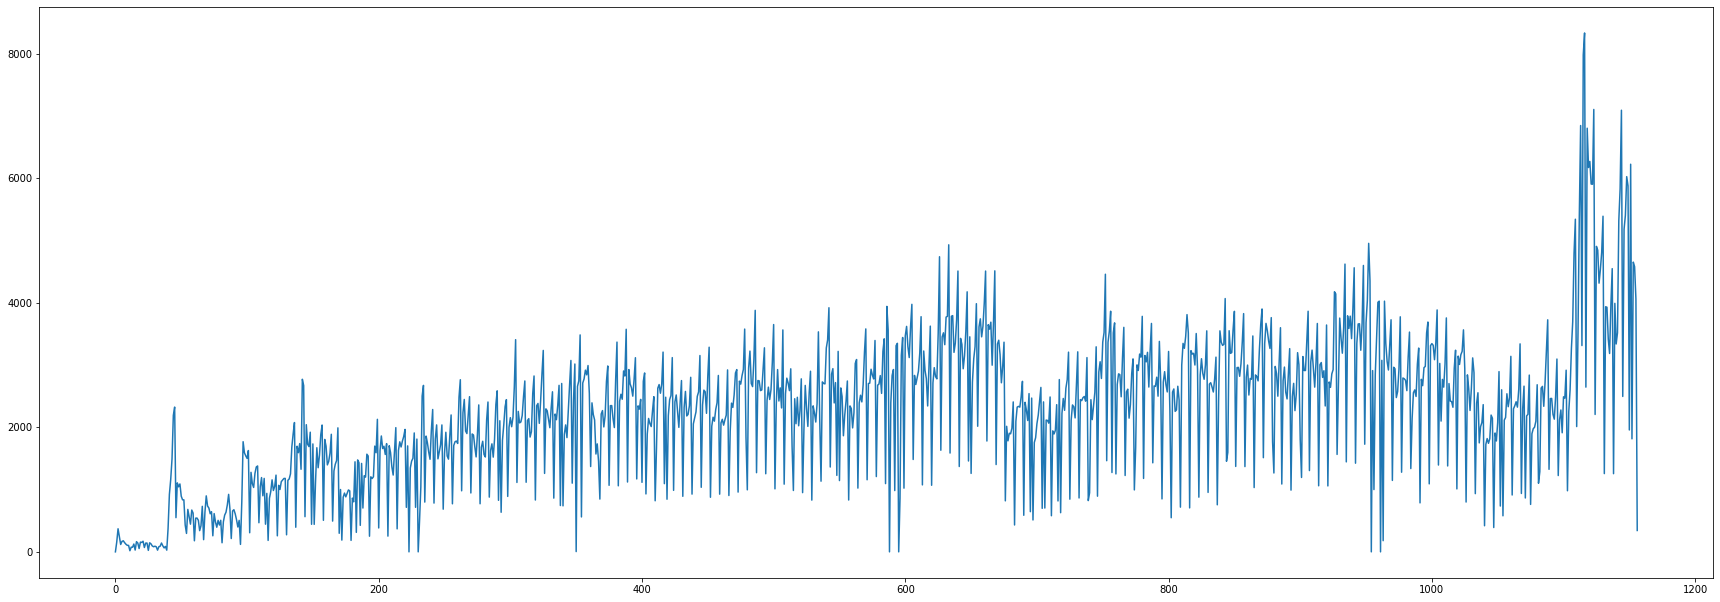

In [ ]:
df2 = df2.head(n=len(df2))

fig, ax = pyplot.subplots()
pyplot.plot(range(len(df2['Price'])), df2['Price'])
fig.set_size_inches(30, 10.5, forward=True)
pyplot.show()

In [ ]:
df2

,Price
Timestamp,
2018-05-16,0.15
2018-05-17,156.34
2018-05-18,370.60
2018-05-19,239.73
2018-05-20,118.32
...,...
2021-07-11,1814.46
2021-07-12,4651.45
2021-07-13,4578.15


In [ ]:
# Normalização dos dados
scaler = MinMaxScaler()
df_n = scaler.fit_transform(df2)
#df_n

In [ ]:
#from sklearn.linear_model import LogisticRegression
from sklearn import metrics


# Conjunto de treinamento e teste
#X = df['Timestamp'].values.reshape(-1,1)
X = df_n[:,0]
print(X.shape)
y = [0,0]
for i in range(len(X)-2):
  y.append(X[i+1])
y = np.array(y)
print(y.shape)
#y = df['Price'].values.reshape(-1,1)
y

df_n = pd.DataFrame({'X': X, 'y':y})
df_n

(1157,)
(1157,)


,X,y
0,0.000018,0.000000
1,0.018768,0.000000
2,0.044488,0.018768
3,0.028778,0.044488
4,0.014204,0.028778
...,...,...
1152,0.217814,0.747027
1153,0.558376,0.217814
1154,0.549577,0.558376
1155,0.487339,0.549577


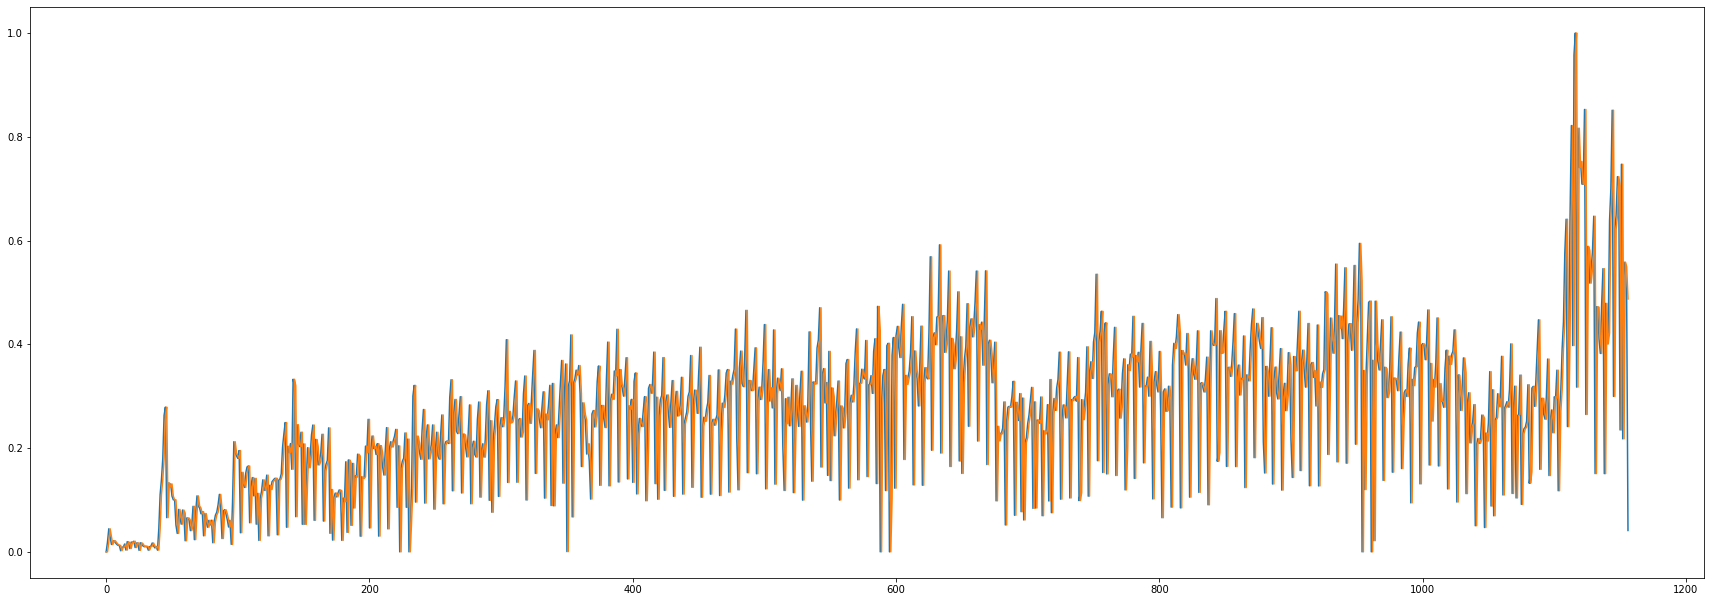

In [ ]:
fig, ax = pyplot.subplots()
pyplot.plot(range(len(X)), X)
pyplot.plot(range(len(y)), y)
fig.set_size_inches(30, 10.5, forward=True)
pyplot.show()

# Previsão

In [ ]:
df_results_rmse = pd.DataFrame()  

In [ ]:
## GRID SEARCH : Linear Regression

results_rmse_lr = []
lr = LinearRegression()  


X_train, X_test, y_train, y_test = train_test_split(
  df_n['X'].values.reshape(-1,1), 
  df_n['y'].values.reshape(-1,1), 
  test_size=0.3, 
  shuffle=False)
  
#GridSearch (seleção de parâmetros)
parameters = {'n_jobs':[1, 2, 3, 4, 5, 10]}
lr = LinearRegression()
clf = GridSearchCV(lr, param_grid=parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'n_jobs': [1, 2, 3, 4, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
## PREDICTIONS : Linear Regression

results_rmse_lr = []
lr = LinearRegression(clf.best_params_['n_jobs'])  


for i in range(0, 30):
  X_train, X_test, y_train, y_test = train_test_split(df_n['X'].values.reshape(-1,1),
                                                      df_n['y'].values.reshape(-1,1), 
                                                      test_size=0.2, 
                                                      shuffle=False)
  
  # Treinamento
  lr.fit(X_train, y_train)
  #print(X_train[1,0])

  # Teste
  y_pred_LR = lr.predict(X_test)
  # Metrics
  mse_LR = mean_squared_error(y_test, y_pred_LR)
  rmse_LR = np.sqrt(mse_LR)
  results_rmse_lr.append(rmse_LR)
df_results_rmse['lr'] = results_rmse_lr

In [ ]:
##Imprimindo o dataFrame LR
y_test_desnormalized = scaler.inverse_transform(y_test)
y_pred_LR_desnormalized = scaler.inverse_transform(y_pred_LR)
# Visualising the results
df_lr = pd.DataFrame()
df_lr['real'] = y_test_desnormalized[:,0].tolist()
df_lr['predicted lr'] = y_pred_LR_desnormalized[:,0].tolist()
df_lr

,real,predicted lr
0,2856.97,2478.708734
1,2925.19,3102.130005
2,4175.50,3084.858038
3,4140.86,1800.150797
4,1564.30,2348.969537
...,...,...
227,6222.97,1924.883915
228,1814.46,3339.445034
229,4651.45,3302.896675
230,4578.15,3044.385592


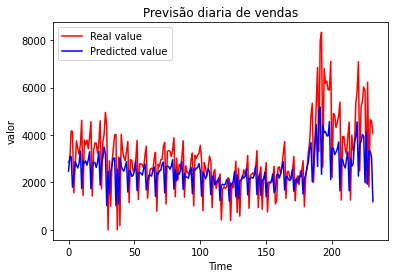

In [ ]:
# Visualising the results LR
plt.plot(df_lr.index, y_test_desnormalized, color = 'red', label = 'Real value')
plt.plot(df_lr.index, y_pred_LR_desnormalized, color = 'blue', label = 'Predicted value')
plt.title('Previsão diaria de vendas')
plt.xlabel('Time')
plt.ylabel('valor')
plt.legend()
plt.show()

In [ ]:
## GRID SEARCH : Support Vector Regression (SVR)
results_rmse_svr = []
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(
  df_n['X'].values.reshape(-1,1), 
  df_n['y'].values.reshape(-1,1), 
  test_size=0.3, 
  shuffle=False)
  
#GridSearch (seleção de parâmetros)
parameters = {'C':[0.1, 1, 10, 100], 'epsilon':[0.1, 0.01, 0.0001], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf', 'linear', 'poly']}
svr = SVR()
clf = GridSearchCV(svr, param_grid=parameters)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.1, 0.01, 0.0001],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
## PREDICTIONS : Support Vector Regression (SVR)
results_rmse_svr = []
from sklearn import svm

for i in range(0, 30):
  X_train, X_test, y_train, y_test = train_test_split(df_n['X'].values.reshape(-1,1), df_n['y'].values.reshape(-1,1), test_size=0.2, shuffle=False)#stratify=None, random_state=None)


# Treinamento
#for i in range(0, 30):
  supportVectorRegModel = svm.SVR(C = clf.best_params_['C'], epsilon = clf.best_params_['epsilon'], gamma = clf.best_params_['gamma'], kernel = clf.best_params_['kernel'])
  supportVectorRegModel.fit(X_train, y_train)
  # Teste
  y_pred_SVR = supportVectorRegModel.predict(X_test)

  # Métrics
  mse_SVR = mean_squared_error(y_test, y_pred_SVR)
  rmse_SVR = np.sqrt(mse_SVR)
  rmse_SVR
  results_rmse_svr.append(rmse_SVR)
df_results_rmse['svr'] = results_rmse_svr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
##Imprimindo o dataFrame svr
y_test_desnormalized = scaler.inverse_transform(y_test)
y_pred_svr_desnormalized = scaler.inverse_transform([y_pred_SVR])
# Visualising the results
df_svr = pd.DataFrame()
df_svr['real'] = y_test_desnormalized[:,0].tolist()
df_svr['predicted svr'] = y_pred_svr_desnormalized.tolist()[0]
df_svr



,real,predicted svr
0,2856.97,2632.565676
1,2925.19,3593.356650
2,4175.50,3566.737812
3,4140.86,1586.800363
4,1564.30,2432.617014
...,...,...
227,6222.97,1779.033865
228,1814.46,3959.096718
229,4651.45,3902.769904
230,4578.15,3504.363358


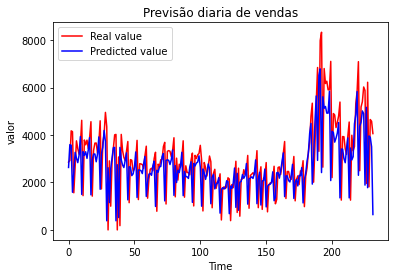

In [ ]:
# Visualising the results SVR
plt.plot(df_svr.index, y_test_desnormalized, color = 'red', label = 'Real value')
plt.plot(df_svr.index, y_pred_svr_desnormalized[0], color = 'blue', label = 'Predicted value')
plt.title('Previsão diaria de vendas')
plt.xlabel('Time')
plt.ylabel('valor')
plt.legend()
plt.show()

In [ ]:
## GRID SEARCH : RANDOM FOREST
X_train, X_test, y_train, y_test = train_test_split(
  df_n['X'].values.reshape(-1,1), 
  df_n['y'].values.reshape(-1,1), 
  test_size=0.3, 
  shuffle=False)
  
#GridSearch (seleção de parâmetros)
parameters = {'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
   # 'max_features': [1, 2, 3],
    'min_samples_leaf': [1, 3, 4, 5],
    'min_samples_split': [0.1, 1.0]}
    #'n_estimators': [1, 100, 200, 300, 1000]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf, param_grid=parameters)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [ ]:
clf.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'min_samples_leaf': 1,
 'min_samples_split': 0.1}

In [ ]:
## PREDICTIONS : Random Forest
results_rmse_rf = []
for i in range(0, 30):
  X_train, X_test, y_train, y_test = train_test_split(df_n['X'].values.reshape(-1,1), df_n['y'].values.reshape(-1,1), test_size=0.2, train_size=0.1)#, shuffle=False, stratify=None, random_state=None)
  # Treinamento
  rf = RandomForestRegressor(bootstrap = clf.best_params_['bootstrap'], max_depth = clf.best_params_['max_depth'], min_samples_leaf = clf.best_params_['min_samples_leaf'], min_samples_split = clf.best_params_['min_samples_split'])   
  rf.fit(X_train, y_train) 
  # Teste
  y_pred_RF = rf.predict(X_test)

  # Metrics
  mse_RF = mean_squared_error(y_test, y_pred_RF)
  rmse_RF = np.sqrt(mse_RF)
  results_rmse_rf.append(rmse_RF)
df_results_rmse['rf'] = results_rmse_rf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConv

In [ ]:
##Imprimindo o dataFrame Random Forest
y_test_desnormalized = scaler.inverse_transform(y_test)
y_pred_rf_desnormalized = scaler.inverse_transform([y_pred_RF])
# Visualising the results
df_rf = pd.DataFrame()
df_rf['real'] = y_test_desnormalized[:,0].tolist()
df_rf['predicted rf'] = y_pred_rf_desnormalized.tolist()[0]
df_rf


,real,predicted rf
0,3119.26,3060.440154
1,18.22,629.765737
2,1860.98,2058.766458
3,2476.33,2434.468728
4,1144.26,2734.394512
...,...,...
227,1683.71,1304.256615
228,1178.94,2116.836172
229,2265.63,2434.468728
230,3013.61,2748.039970


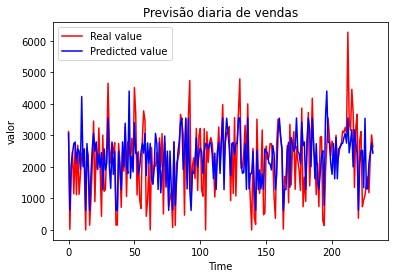

In [ ]:
# Visualising the results RF
plt.plot(df_rf.index, y_test_desnormalized, color = 'red', label = 'Real value')
plt.plot(df_rf.index, y_pred_rf_desnormalized[0], color = 'blue', label = 'Predicted value')
plt.title('Previsão diaria de vendas')
plt.xlabel('Time')
plt.ylabel('valor')
plt.legend()
plt.show()

In [ ]:
## GRID SEARCH : KNeighbors
X_train, X_test, y_train, y_test = train_test_split(
  df_n['X'].values.reshape(-1,1), 
  df_n['y'].values.reshape(-1,1), 
  test_size=0.3, 
  shuffle=False)
  
#GridSearch (seleção de parâmetros)
parameters = {'n_neighbors': [1, 3, 5, 10, 14, 19],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
              'p':[1, 2],
              'leaf_size': [1, 20, 40]
              }
knn = KNeighborsRegressor()
clf = GridSearchCV(knn, param_grid=parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [1, 20, 40],
                         'metric': ['euclidean', 'manhattan', 'minkowski',
                                    'chebyshev'],
                         'n_neighbors': [1, 3, 5, 10, 14, 19], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
## PREDICTIONS : KNeighbor
results_rmse_knn = []
for i in range(0, 30):
  X_train, X_test, y_train, y_test = train_test_split(df_n['X'].values.reshape(-1,1), df_n['y'].values.reshape(-1,1), test_size=0.2, train_size=0.1)#, shuffle=False, stratify=None, random_state=None)
  # Treinamento
  knn = KNeighborsRegressor(metric = clf.best_params_['metric'], weights = clf.best_params_['weights'], p = clf.best_params_['p'], leaf_size = clf.best_params_['leaf_size']) 
  knn.fit(X_train, y_train) 
  # Teste
  y_pred_knn = knn.predict(X_test)

  # Metrics
  mse_knn = mean_squared_error(y_test, y_pred_knn)
  rmse_knn = np.sqrt(mse_knn)
  results_rmse_knn.append(rmse_knn)
df_results_rmse['knn'] = results_rmse_knn

In [ ]:
##Imprimindo o dataFrame knn
y_test_desnormalized = scaler.inverse_transform(y_test)
y_pred_knn_desnormalized = scaler.inverse_transform(y_pred_knn)
# Visualising the results
df_knn = pd.DataFrame()
df_knn['real'] = y_test_desnormalized[:,0].tolist()
df_knn['predicted knn'] = y_pred_knn_desnormalized[:,0].tolist()
df_knn

,real,predicted knn
0,1671.25,1982.086
1,3586.10,3387.676
2,2407.05,1170.386
3,3528.34,1810.486
4,1775.21,2578.054
...,...,...
227,2118.04,2578.054
228,3604.10,906.602
229,3619.65,3120.988
230,1567.72,2578.054


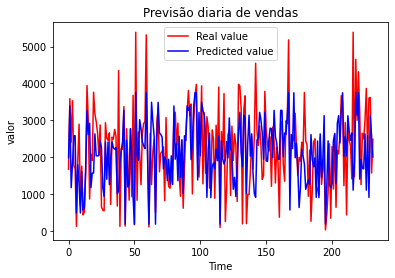

In [ ]:
# Visualising the results SVR
plt.plot(df_knn.index, y_test_desnormalized, color = 'red', label = 'Real value')
plt.plot(df_knn.index, y_pred_knn_desnormalized, color = 'blue', label = 'Predicted value')
plt.title('Previsão diaria de vendas')
plt.xlabel('Time')
plt.ylabel('valor')
plt.legend()
plt.show()

In [ ]:
## GRID SEARCH : Gradient Boosting Regressor
X_train, X_test, y_train, y_test = train_test_split(
  df_n['X'].values.reshape(-1,1), 
  df_n['y'].values.reshape(-1,1), 
  test_size=0.3, 
  shuffle=False)
  
#GridSearch (seleção de parâmetros)
parameters = {
    'learning_rate': [0.001, 0.01, 0.1],
    'min_samples_split': [50, 100],
    'min_samples_leaf': [50, 100],
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [2, 4, 6, 8, 10]}

gbr = GradientBoostingRegressor()
clf = GridSearchCV(gbr, param_grid=parameters)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...
                            

In [ ]:
## PREDICTIONS : Gradient Boosting Regressor
results_rmse_gbr = []
for i in range(0, 30):
  X_train, X_test, y_train, y_test = train_test_split(df_n['X'].values.reshape(-1,1), df_n['y'].values.reshape(-1,1), test_size=0.2, shuffle=False)#, shuffle=False, stratify=None, random_state=None)
  # Treinamento
  gbr = GradientBoostingRegressor(learning_rate = clf.best_params_['learning_rate'], max_depth = clf.best_params_['max_depth'], min_samples_leaf = clf.best_params_['min_samples_leaf'], n_estimators = clf.best_params_['n_estimators']) #n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls'
  gbr.fit(X_train, y_train) 
  # Teste
  y_pred_gbr = gbr.predict(X_test)
  # Metrics
  mse_gbr = mean_squared_error(y_test, y_pred_gbr)
  rmse_gbr = np.sqrt(mse_gbr)
  results_rmse_gbr.append(rmse_gbr)
df_results_rmse['gbr'] = results_rmse_gbr

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

In [ ]:
##Imprimindo o dataFrame Gradient Boosting Regressor
y_test_desnormalized = scaler.inverse_transform(y_test)
y_pred_gbr_desnormalized = scaler.inverse_transform([y_pred_gbr])
# Visualising the results
df_gbr = pd.DataFrame()
df_gbr['real'] = y_test_desnormalized[:,0].tolist()
df_gbr['predicted gbr'] = y_pred_gbr_desnormalized.tolist()[0]
df_gbr


,real,predicted gbr
0,2856.97,2348.102431
1,2925.19,2789.055802
2,4175.50,2789.055802
3,4140.86,1890.183311
4,1564.30,2057.570925
...,...,...
227,6222.97,1846.540797
228,1814.46,2789.055802
229,4651.45,2789.055802
230,4578.15,2789.055802


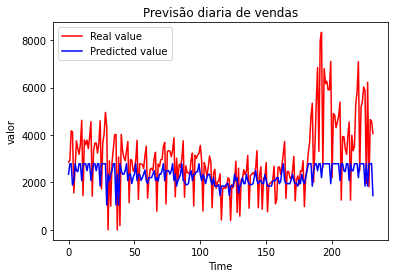

In [ ]:
# Visualising the results GBR
plt.plot(df_gbr.index, y_test_desnormalized, color = 'red', label = 'Real value')
plt.plot(df_gbr.index, y_pred_gbr_desnormalized[0], color = 'blue', label = 'Predicted value')
plt.title('Previsão diaria de vendas')
plt.xlabel('Time')
plt.ylabel('valor')
plt.legend()
plt.show()

In [ ]:
## GRID SEARCH : AdaBoost Regressor
X_train, X_test, y_train, y_test = train_test_split(
  df_n['X'].values.reshape(-1,1), 
  df_n['y'].values.reshape(-1,1), 
  test_size=0.3, 
  shuffle=False)
  
#GridSearch (seleção de parâmetros)
parameters = {"n_estimators":[100,500],"learning_rate":list(np.linspace(0.01,1,10)),"loss":["linear", "square", "exponential"]}
abr = AdaBoostRegressor()
clf = GridSearchCV(abr, param_grid=parameters)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.12, 0.23, 0.34, 0.45, 0.56,
                                           0.67, 0.78, 0.89, 1.0],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [100, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
## PREDICTIONS : AdaBoost Regressor
results_rmse_abr = []
for i in range(0, 30):
  X_train, X_test, y_train, y_test = train_test_split(df_n['X'].values.reshape(-1,1), df_n['y'].values.reshape(-1,1), test_size=0.2, shuffle=False)#, shuffle=False, stratify=None, random_state=None)
  # Treinamento
  abr = AdaBoostRegressor(learning_rate = clf.best_params_['learning_rate'], loss= clf.best_params_['loss'], n_estimators=clf.best_params_['n_estimators']) 
  abr.fit(X_train, y_train) 
  # Teste
  y_pred_abr = abr.predict(X_test)

  # Metrics
  mse_abr = mean_squared_error(y_test, y_pred_gbr)
  rmse_abr = np.sqrt(mse_abr)
  results_rmse_abr.append(rmse_abr)
df_results_rmse['abr'] = results_rmse_abr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
##Imprimindo o dataFrame abr
y_test_desnormalized = scaler.inverse_transform(y_test)
y_pred_abr_desnormalized = scaler.inverse_transform([y_pred_abr])
# Visualising the results
df_abr = pd.DataFrame()
df_abr['real'] = y_test_desnormalized[:,0].tolist()
df_abr['predicted abr'] = y_pred_abr_desnormalized.tolist()[0]
df_abr


,real,predicted abr
0,2856.97,2219.145896
1,2925.19,3054.919434
2,4175.50,3054.919434
3,4140.86,2307.716181
4,1564.30,1992.543310
...,...,...
227,6222.97,1920.933817
228,1814.46,3054.919434
229,4651.45,3054.919434
230,4578.15,3054.919434


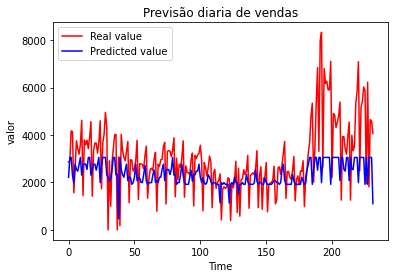

In [ ]:
# Visualising the results ABR
plt.plot(df_abr.index, y_test_desnormalized, color = 'red', label = 'Real value')
plt.plot(df_abr.index, y_pred_abr_desnormalized[0], color = 'blue', label = 'Predicted value')
plt.title('Previsão diaria de vendas')
plt.xlabel('Time')
plt.ylabel('valor')
plt.legend()
plt.show()

In [ ]:
## GRID SEARCH : Ridge
X_train, X_test, y_train, y_test = train_test_split(
  df_n['X'].values.reshape(-1,1), 
  df_n['y'].values.reshape(-1,1), 
  test_size=0.3, 
  shuffle=False)
  
#GridSearch (seleção de parâmetros)
parameters = { 'alpha': list(x / 10 for x in range(0, 101)), "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

rcv = Ridge() 
clf = GridSearchCV(rcv, param_grid=parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
                                   1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
                                   2.7, 2.8, 2.9, ...],
                         'fit_intercept': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
## PREDICTIONS : Ridge

# Treinamento
results_rmse_rcv = []

for i in range(0, 30):
  X_train, X_test, y_train, y_test = train_test_split(df_n['X'].values.reshape(-1,1), df_n['y'].values.reshape(-1,1), test_size=0.2, shuffle=False)
  rcv = Ridge(alpha = clf.best_params_['alpha'], fit_intercept=clf.best_params_['fit_intercept'], solver=clf.best_params_['solver']) 
  rcv.fit(X_train, y_train) 
  # Teste
  y_pred_rcv = rcv.predict(X_test)

  # Metrics
  mse_rcv = mean_squared_error(y_test, y_pred_rcv)
  rmse_rcv = np.sqrt(mse_rcv)
  results_rmse_rcv.append(rmse_rcv)
df_results_rmse['rcv'] = results_rmse_rcv

In [ ]:
##Imprimindo o dataFrame Ridge
y_test_desnormalized = scaler.inverse_transform(y_test)
y_pred_rcv_desnormalized = scaler.inverse_transform(y_pred_rcv)
# Visualising the results
df_rcv= pd.DataFrame()
df_rcv['real'] = y_test_desnormalized[:,0].tolist()
df_rcv['predicted svr'] = y_pred_rcv_desnormalized[:,0].tolist()
df_rcv

,real,predicted svr
0,2856.97,2621.028000
1,2925.19,3741.330448
2,4175.50,3710.292324
3,4140.86,1401.643688
4,1564.30,2387.883662
...,...,...
227,6222.97,1625.791988
228,1814.46,4167.791046
229,4651.45,4102.112799
230,4578.15,3637.562401


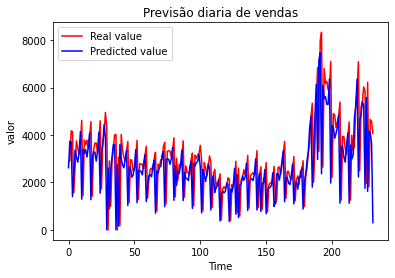

In [ ]:
# Visualising the results rcv
plt.plot(df_rcv.index, y_test_desnormalized, color = 'red', label = 'Real value')
plt.plot(df_rcv.index, y_pred_rcv_desnormalized, color = 'blue', label = 'Predicted value')
plt.title('Previsão diaria de vendas')
plt.xlabel('Time')
plt.ylabel('valor')
plt.legend()
plt.show()

In [ ]:
## GRID SEARCH : Decision Tree
X_train, X_test, y_train, y_test = train_test_split(
  df_n['X'].values.reshape(-1,1), 
  df_n['y'].values.reshape(-1,1), 
  test_size=0.3, 
  shuffle=False)
  
#GridSearch (seleção de parâmetros)
parameters = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

dt = DecisionTreeRegressor() 
clf = GridSearchCV(dt, param_grid=parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                 

In [ ]:
## PREDICTIONS : Decision Tree
results_rmse_dt = []
for i in range(0, 30):
  X_train, X_test, y_train, y_test = train_test_split(df_n['X'].values.reshape(-1,1), df_n['y'].values.reshape(-1,1), test_size=0.2, shuffle=False)#, shuffle=False, stratify=None, random_state=None)
  # Treinamento
  dt = DecisionTreeRegressor(criterion = clf.best_params_['criterion'], max_depth = clf.best_params_['max_depth'], max_leaf_nodes = clf.best_params_['max_leaf_nodes'], min_samples_leaf = clf.best_params_['min_samples_leaf'], min_samples_split = clf.best_params_['min_samples_split']) 
  dt.fit(X_train, y_train) 
  # Teste
  y_pred_dt = dt.predict(X_test)

  # Metrics
  mse_dt = mean_squared_error(y_test, y_pred_dt)
  rmse_dt = np.sqrt(mse_dt)
  results_rmse_dt.append(rmse_dt)
df_results_rmse['dt'] = results_rmse_dt

In [ ]:
##Imprimindo o dataFrame dt
y_test_desnormalized = scaler.inverse_transform(y_test)
y_pred_dt_desnormalized = scaler.inverse_transform([y_pred_dt])
# Visualising the results
df_dt = pd.DataFrame()
df_dt['real'] = y_test_desnormalized[:,0].tolist()
df_dt['predicted dt'] = y_pred_dt_desnormalized.tolist()[0]
df_dt

,real,predicted dt
0,2856.97,2614.920212
1,2925.19,3226.245741
2,4175.50,3226.245741
3,4140.86,1974.896049
4,1564.30,1974.896049
...,...,...
227,6222.97,1974.896049
228,1814.46,3226.245741
229,4651.45,3226.245741
230,4578.15,3226.245741


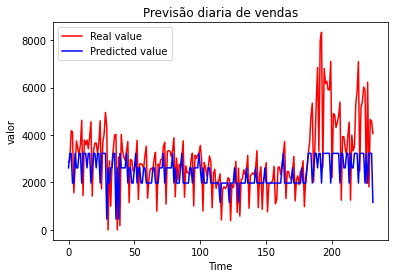

In [ ]:
# Visualising the results dt
plt.plot(df_dt.index, y_test_desnormalized, color = 'red', label = 'Real value')
plt.plot(df_dt.index, y_pred_dt_desnormalized[0], color = 'blue', label = 'Predicted value')
plt.title('Previsão diaria de vendas')
plt.xlabel('Time')
plt.ylabel('valor')
plt.legend()
plt.show()

In [ ]:
## GRID SEARCH : Extra Tree
X_train, X_test, y_train, y_test = train_test_split(
  df_n['X'].values.reshape(-1,1), 
  df_n['y'].values.reshape(-1,1), 
  test_size=0.3, 
  shuffle=False)
  
#GridSearch (seleção de parâmetros)
parameters = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

et = ExtraTreesRegressor() 
clf = GridSearchCV(et, param_grid=parameters)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=None, error_score=nan,
             estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                           criterion='mse', max_depth=None,
                                           max_features='auto',
                                           max_leaf_nodes=None,
                                           max_samples=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100, n_jobs=None,
                                           oob_score=False, random_state=None,
                                           verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             

In [ ]:
## PREDICTIONS : Extra Tree
results_rmse_et = []
for i in range(0, 30):
  X_train, X_test, y_train, y_test = train_test_split(df_n['X'].values.reshape(-1,1), df_n['y'].values.reshape(-1,1), test_size=0.2, shuffle=False)#, shuffle=False, stratify=None, random_state=None)
  # Treinamento
  et = ExtraTreesRegressor(criterion = clf.best_params_['criterion'], max_depth = clf.best_params_['max_depth'], max_leaf_nodes = clf.best_params_['max_leaf_nodes'], min_samples_leaf = clf.best_params_['min_samples_leaf'], min_samples_split = clf.best_params_['min_samples_split']) 
  et.fit(X_train, y_train) 
  # Teste
  y_pred_et = et.predict(X_test)

  # Metrics
  mse_et = mean_squared_error(y_test, y_pred_et)
  rmse_et = np.sqrt(mse_et)
  results_rmse_et.append(rmse_et)
df_results_rmse['et'] = results_rmse_et

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConv

In [ ]:
##Imprimindo o dataFrame dt
y_test_desnormalized = scaler.inverse_transform(y_test)
y_pred_et_desnormalized = scaler.inverse_transform([y_pred_dt])
# Visualising the results
df_et = pd.DataFrame()
df_et['real'] = y_test_desnormalized[:,0].tolist()
df_et['predicted et'] = y_pred_et_desnormalized.tolist()[0]
df_et

,real,predicted et
0,2856.97,2614.920212
1,2925.19,3226.245741
2,4175.50,3226.245741
3,4140.86,1974.896049
4,1564.30,1974.896049
...,...,...
227,6222.97,1974.896049
228,1814.46,3226.245741
229,4651.45,3226.245741
230,4578.15,3226.245741


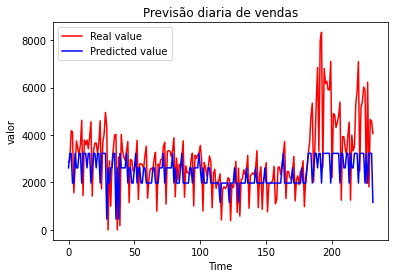

In [ ]:
# Visualising the results dt
plt.plot(df_et.index, y_test_desnormalized, color = 'red', label = 'Real value')
plt.plot(df_et.index, y_pred_et_desnormalized[0], color = 'blue', label = 'Predicted value')
plt.title('Previsão diaria de vendas')
plt.xlabel('Time')
plt.ylabel('valor')
plt.legend()
plt.show()

In [ ]:
 df_results_rmse

,lr,svr,rf,knn,gbr,abr,rcv,dt,et
0,0.171351,0.178265,0.132706,0.118481,0.183023,0.183023,0.188131,0.179117,0.189356
1,0.171351,0.178265,0.123199,0.139932,0.183023,0.183023,0.188152,0.179117,0.189793
2,0.171351,0.178265,0.139240,0.114377,0.183023,0.183023,0.188121,0.179117,0.187491
3,0.171351,0.178265,0.130763,0.123851,0.183023,0.183023,0.188197,0.179117,0.191241
4,0.171351,0.178265,0.132372,0.142832,0.183023,0.183023,0.188141,0.179117,0.190185
5,0.171351,0.178265,0.126661,0.119447,0.183023,0.183023,0.188129,0.179117,0.189242
6,0.171351,0.178265,0.125952,0.124796,0.183023,0.183023,0.188140,0.179117,0.189884
7,0.171351,0.178265,0.129443,0.121124,0.183023,0.183023,0.188117,0.179117,0.189624
8,0.171351,0.178265,0.120854,0.116397,0.183023,0.183023,0.188121,0.179117,0.190874
9,0.171351,0.178265,0.134479,0.135317,0.183023,0.183023,0.188113,0.179117,0.189314


In [ ]:
df_results_rmse['lr'].mean()

0.17135088705596538

# ENSEMBLE

In [ ]:
## RMSE Metrics
print('LR=', df_results_rmse['lr'].mean())
print( 'SVR=',df_results_rmse['svr'].mean())
print('RF=',df_results_rmse['rf'].mean())
print( 'Knn=',df_results_rmse['knn'].mean())
print( 'Gbr=',df_results_rmse['gbr'].mean())
print( 'abr=',df_results_rmse['abr'].mean())
print( 'rcv=',df_results_rmse['rcv'].mean())
print( 'dt=',df_results_rmse['dt'].mean())
print( 'et=',df_results_rmse['et'].mean())

LR= 0.17135088705596538
SVR= 0.17826536486495542
RF= 0.12629420531329616
Knn= 0.1275697191105927
Gbr= 0.18302278144030412
abr= 0.18302278144030412
rcv= 0.18814592645466321
dt= 0.17911699255684582
et= 0.19043278452707826


In [ ]:
## ENSEMBLE (BEST 3 - Median)
y_ensemble = []
for i in range(len(y_pred_RF)):
  y_ensemble.append((y_pred_rcv[i] + y_pred_LR[i] + y_pred_SVR[i]) / 3)

  # Metrics
mse_E = mean_squared_error(y_test, y_ensemble)
rmse_E = np.sqrt(mse_E)
rmse_E

print('E=',rmse_E)

E= 0.17684794626659925


In [ ]:
y_ensemble_desnormalized = scaler.inverse_transform(y_ensemble)

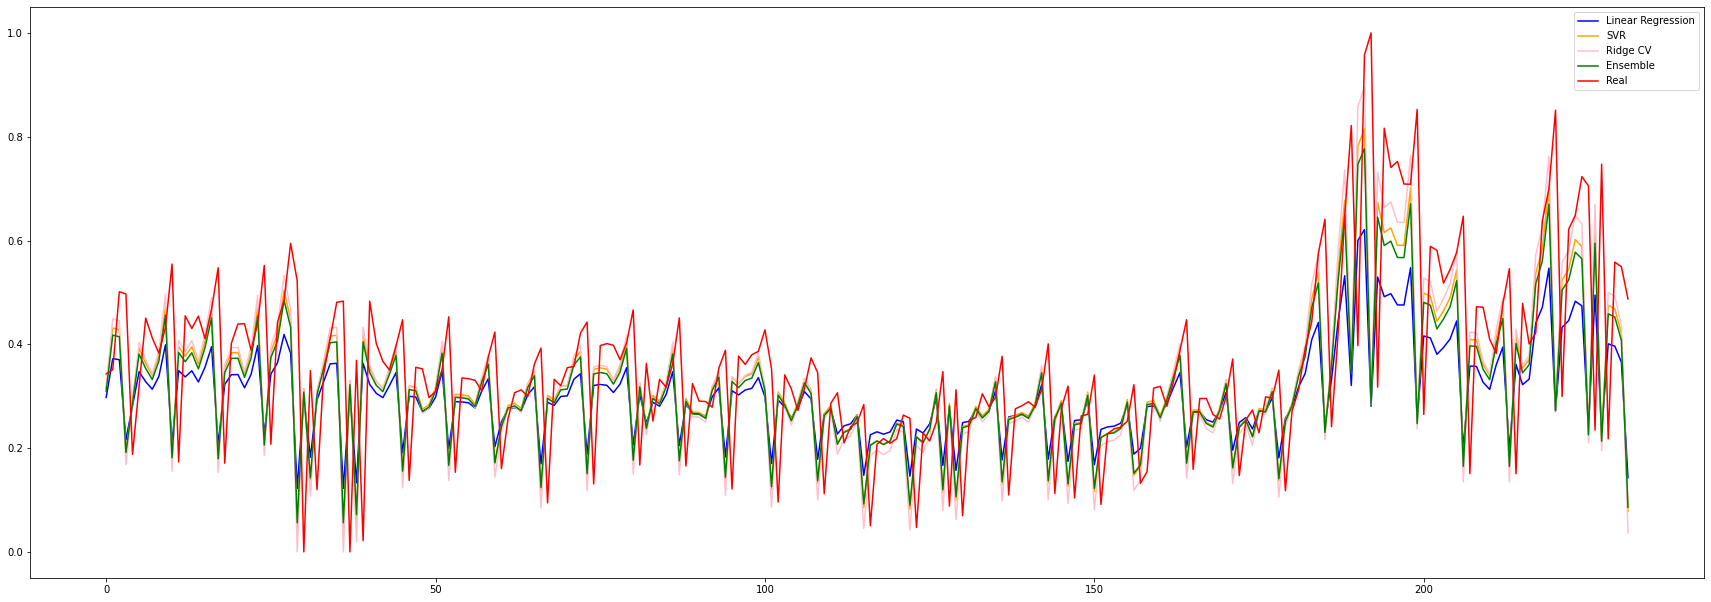

In [ ]:
fig, ax = pyplot.subplots()
pyplot.plot(range(len(y_pred_LR)), y_pred_LR, c='blue', label='Linear Regression')
pyplot.plot(range(len(y_pred_SVR)), y_pred_SVR, c='orange', label='SVR')
#pyplot.plot(range(len(y_pred_RF)), y_pred_RF, c='brown', label='Random Forest')
#pyplot.plot(range(len(y_pred_knn)), y_pred_knn, c='blue', label='KNeighbors')
#pyplot.plot(range(len(y_pred_gbr)), y_pred_gbr, c='gray', label='Gradient Boosting')
#pyplot.plot(range(len(y_pred_abr)), y_pred_abr, c='blue', label='AdaBoost')
pyplot.plot(range(len(y_pred_rcv)), y_pred_rcv, c='pink', label='Ridge CV')
#pyplot.plot(range(len(y_pred_dt)), y_pred_dt, c='red', label='Decision Tree')
#pyplot.plot(range(len(y_pred_et)), y_pred_et, c='orange', label='Extra Tree')
pyplot.plot(range(len(y_ensemble)), y_ensemble, c='green', label='Ensemble')
pyplot.plot(range(len(y_test)), y_test, c='red', label='Real')
fig.set_size_inches(30, 10.5, forward=True)
leg = pyplot.legend();
pyplot.show()

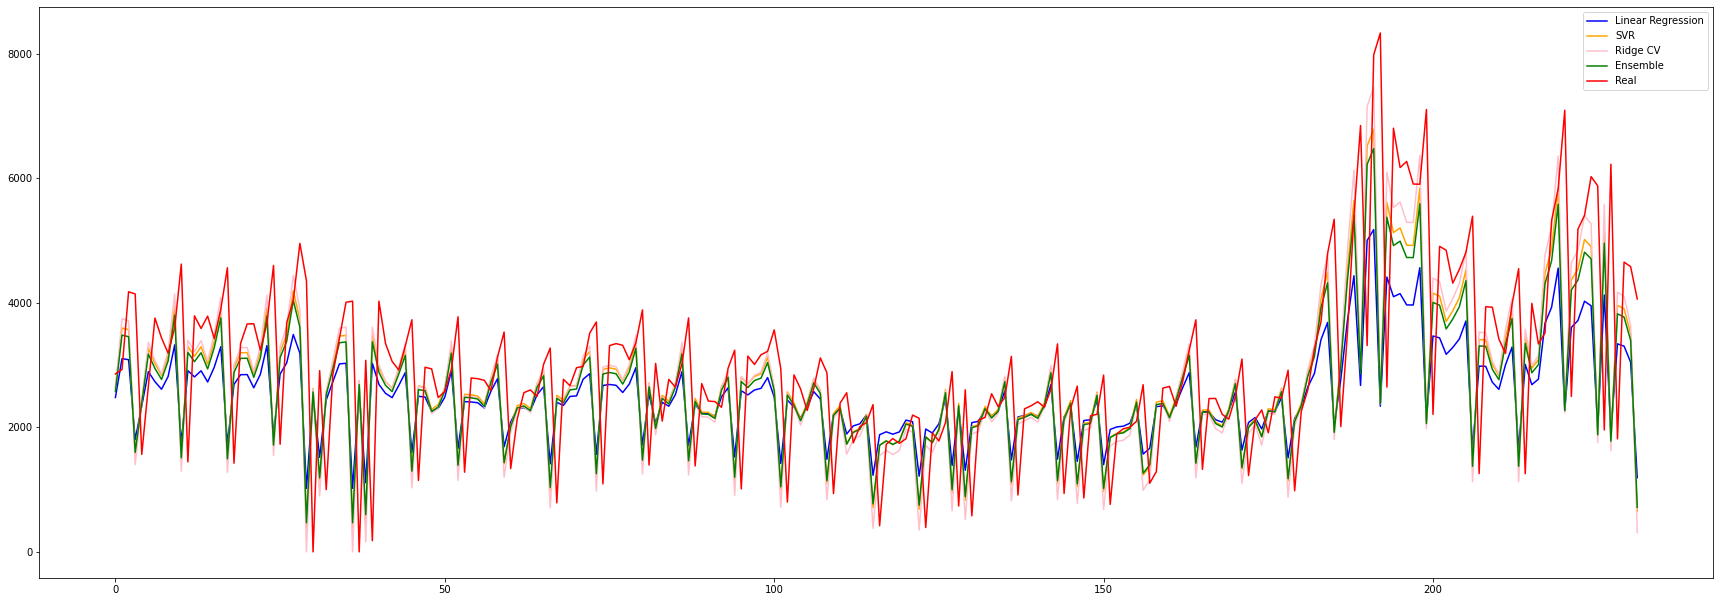

In [ ]:
fig, ax = pyplot.subplots()
pyplot.plot(range(len(y_pred_LR_desnormalized)), y_pred_LR_desnormalized, c='blue', label='Linear Regression')
pyplot.plot(range(len(y_pred_svr_desnormalized[0])), y_pred_svr_desnormalized[0], c='orange', label='SVR')
#pyplot.plot(range(len(y_pred_RF)), y_pred_RF, c='brown', label='Random Forest')
#pyplot.plot(range(len(y_pred_knn)), y_pred_knn, c='blue', label='KNeighbors')
#pyplot.plot(range(len(y_pred_gbr)), y_pred_gbr, c='gray', label='Gradient Boosting')
#pyplot.plot(range(len(y_pred_abr)), y_pred_abr, c='blue', label='AdaBoost')
pyplot.plot(range(len(y_pred_rcv_desnormalized)), y_pred_rcv_desnormalized, c='pink', label='Ridge CV')
#pyplot.plot(range(len(y_pred_dt)), y_pred_dt, c='red', label='Decision Tree')
#pyplot.plot(range(len(y_pred_et)), y_pred_et, c='orange', label='Extra Tree')
pyplot.plot(range(len(y_ensemble_desnormalized)), y_ensemble_desnormalized, c='green', label='Ensemble')
pyplot.plot(range(len(y_test_desnormalized)), y_test_desnormalized, c='red', label='Real')
fig.set_size_inches(30, 10.5, forward=True)
leg = pyplot.legend();
pyplot.show()

In [ ]:
## GRID SEARCH : MLPRegressor
df_mlp = pd.DataFrame({'LR' : y_pred_LR[:,0].tolist(), 
                     'SVR': y_pred_SVR.tolist(),
                     'RCV': y_pred_rcv[:,0].tolist(),
                     'y'  : y_test[:,0].tolist()})

y_mlp = df_mlp['y']
X_mlp = df_mlp.drop(columns=['y'])

X_trainMLP, X_testMLP, y_trainMLP, y_testMLP = train_test_split(X_mlp.values, y_mlp.values.reshape(-1,1), test_size=0.3,  shuffle=False, stratify=None)
  
#GridSearch (seleção de parâmetros)
parameters = {"hidden_layer_sizes": [(1,),(50,)], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005]}

mlp = MLPRegressor()
clf = GridSearchCV(mlp, param_grid=parameters)
clf.fit(X_trainMLP, y_trainMLP)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when 

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_sta...rue,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['identity

In [ ]:
## ENSEMBLE (LR + SVR + RCV | MLP)

from sklearn.neural_network import MLPRegressor
type(y_pred_LR[:,0])
type(y_test[:,0])
df_e = pd.DataFrame({'LR' : y_pred_LR[:,0].tolist(), 
                     'SVR': y_pred_SVR[:].tolist(),
                     'RCV': y_pred_rcv[:,0].tolist(),
                     'y'  : y_test[:,0].tolist()})
y_e = df_e['y']
X_e = df_e.drop(columns=['y'])

results_rmse_ensemble = []

for i in range(0, 30):
  X_train, X_test, y_train, y_test = train_test_split(X_e.values, y_e.values.reshape(-1,1), test_size=0.3,  shuffle=False, stratify=None)#, random_state=0
  mlp = MLPRegressor(max_iter=150, activation = clf.best_params_['activation'], alpha = clf.best_params_['alpha'], hidden_layer_sizes = clf.best_params_['hidden_layer_sizes'], solver = clf.best_params_['solver'])#random_state=1
  mlp = mlp.fit(X_train, y_train)
  y_pred_En = mlp.predict(X_test)
    # Metrics
  mse_E = mean_squared_error(y_test, y_pred_En)
  rmse_E = np.sqrt(mse_E)
  results_rmse_ensemble.append(rmse_E)
df_results_rmse['ensemble'] = results_rmse_ensemble

df_results_rmse

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when 

,lr,svr,rf,knn,gbr,abr,rcv,dt,et,ensemble
0,0.171351,0.178265,0.132706,0.118481,0.183023,0.183023,0.188131,0.179117,0.189356,0.219692
1,0.171351,0.178265,0.123199,0.139932,0.183023,0.183023,0.188152,0.179117,0.189793,0.218279
2,0.171351,0.178265,0.139240,0.114377,0.183023,0.183023,0.188121,0.179117,0.187491,0.220894
3,0.171351,0.178265,0.130763,0.123851,0.183023,0.183023,0.188197,0.179117,0.191241,0.221781
4,0.171351,0.178265,0.132372,0.142832,0.183023,0.183023,0.188141,0.179117,0.190185,0.239101
5,0.171351,0.178265,0.126661,0.119447,0.183023,0.183023,0.188129,0.179117,0.189242,0.229174
6,0.171351,0.178265,0.125952,0.124796,0.183023,0.183023,0.188140,0.179117,0.189884,0.220408
7,0.171351,0.178265,0.129443,0.121124,0.183023,0.183023,0.188117,0.179117,0.189624,0.220605
8,0.171351,0.178265,0.120854,0.116397,0.183023,0.183023,0.188121,0.179117,0.190874,0.218716
9,0.171351,0.178265,0.134479,0.135317,0.183023,0.183023,0.188113,0.179117,0.189314,0.219901


In [ ]:
##Imprimindo o dataFrame svr
y_test_desnormalized = scaler.inverse_transform(y_test)
y_pred_en_desnormalized = scaler.inverse_transform([y_pred_En])
# Visualising the results
df_en = pd.DataFrame()
df_en['real'] = y_test_desnormalized[:,0].tolist()
df_en['predicted ensenble'] = y_pred_en_desnormalized.tolist()[0]
df_en


,real,predicted ensenble
0,2728.73,2682.571168
1,3238.44,3080.308857
2,3725.25,2677.876746
3,1324.86,2047.331437
4,2460.94,2049.030857
...,...,...
65,6222.97,2251.533498
66,1814.46,3837.040739
67,4651.45,3777.152544
68,4578.15,3353.555900


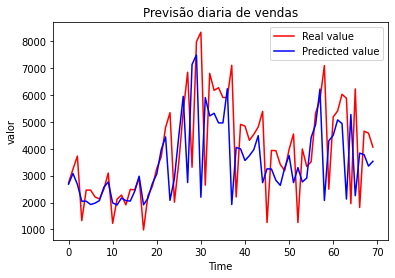

In [ ]:
# Visualising the results SVR
plt.plot(df_en.index, y_test_desnormalized, color = 'red', label = 'Real value')
plt.plot(df_en.index, y_pred_en_desnormalized[0], color = 'blue', label = 'Predicted value')
plt.title('Previsão diaria de vendas')
plt.xlabel('Time')
plt.ylabel('valor')
plt.legend()
plt.show()

In [ ]:
## RMSE Metrics
print('LR=', df_results_rmse['lr'].mean())
print( 'SVR=',df_results_rmse['svr'].mean())
print('RF=',df_results_rmse['rf'].mean())
print( 'KNN=',df_results_rmse['knn'].mean())
print( 'GBR=',df_results_rmse['gbr'].mean())
print( 'ABR=',df_results_rmse['abr'].mean())
print( 'RCV=',df_results_rmse['rcv'].mean())
print( 'DT=',df_results_rmse['dt'].mean())
print( 'ET=',df_results_rmse['et'].mean())
print( 'Ensemble=',df_results_rmse['ensemble'].mean())

LR= 0.17135088705596538
SVR= 0.17826536486495542
RF= 0.12629420531329616
KNN= 0.1275697191105927
GBR= 0.18302278144030412
ABR= 0.18302278144030412
RCV= 0.18814592645466321
DT= 0.17911699255684582
ET= 0.19043278452707826
Ensemble= 0.22555183777737176


In [ ]:
df_results_rmse.describe()

,lr,svr,rf,knn,gbr,abr,rcv,dt,et,ensemble
count,3.000000e+01,3.000000e+01,30.000000,30.000000,3.000000e+01,3.000000e+01,30.000000,30.000000,30.000000,30.000000
mean,1.713509e-01,1.782654e-01,0.126294,0.127570,1.830228e-01,1.830228e-01,0.188146,0.179117,0.190433,0.225552
std,8.469019e-17,2.823006e-17,0.006492,0.008457,2.823006e-17,2.823006e-17,0.000086,0.000000,0.001242,0.013362
min,1.713509e-01,1.782654e-01,0.112449,0.113537,1.830228e-01,1.830228e-01,0.188079,0.179117,0.187491,0.218279
25%,1.713509e-01,1.782654e-01,0.122960,0.122516,1.830228e-01,1.830228e-01,0.188120,0.179117,0.189666,0.219318
50%,1.713509e-01,1.782654e-01,0.126688,0.125252,1.830228e-01,1.830228e-01,0.188130,0.179117,0.190324,0.220750
75%,1.713509e-01,1.782654e-01,0.130606,0.130753,1.830228e-01,1.830228e-01,0.188147,0.179117,0.191220,0.223973
max,1.713509e-01,1.782654e-01,0.139240,0.144620,1.830228e-01,1.830228e-01,0.188579,0.179117,0.193442,0.282557


In [ ]:
# teste de hipótese: SVR
import pandas as pd
from scipy import stats
antes  = df_results_rmse['svr']
depois = df_results_rmse['ensemble']

ttest, pval = stats.ttest_rel(antes, depois)
print('stat=%.4f, pval=%.4f, Erro_antes=%.4f, Erro_depois=%.4f' % (ttest, pval, antes.mean(), depois.mean()))

# H0 :- means difference between two sample is 0
# H1 :- mean difference between two sample is not 0

if pval < 0.05:
    if (antes.mean() > depois.mean()):
      print("Rejeita H0. H1 é aceitável. Há evidência estatística com significância de 5% que houve melhoria")
    else:
      print("Rejeita H0. H1 é aceitável. Há evidência estatística com significância de 5% que houve piora")
else:
    print("Aceita H0. Nada pode ser concluído. Não Há evidência estatística com significância de 5% que houve alteração")


stat=-19.3829, pval=0.0000, Erro_antes=0.1783, Erro_depois=0.2256
Rejeita H0. H1 é aceitável. Há evidência estatística com significância de 5% que houve piora


In [ ]:
import pandas as pd
from scipy import stats
antes  = df_results_rmse['lr']
depois = df_results_rmse['ensemble']

ttest, pval = stats.ttest_rel(antes, depois)
print('stat=%.4f, pval=%.4f, Erro_antes=%.4f, Erro_depois=%.4f' % (ttest, pval, antes.mean(), depois.mean()))

# H0 :- means difference between two sample is 0
# H1 :- mean difference between two sample is not 0

if pval < 0.05:
    if (antes.mean() > depois.mean()):
      print("Rejeita H0. H1 é aceitável. Há evidência estatística com significância de 5% que houve melhoria")
    else:
      print("Rejeita H0. H1 é aceitável. Há evidência estatística com significância de 5% que houve piora")
else:
    print("Aceita H0. Nada pode ser concluído. Não Há evidência estatística com significância de 5% que houve alteração")


stat=-22.2171, pval=0.0000, Erro_antes=0.1714, Erro_depois=0.2256
Rejeita H0. H1 é aceitável. Há evidência estatística com significância de 5% que houve piora


In [ ]:
import pandas as pd
from scipy import stats
antes  = df_results_rmse['rcv']
depois = df_results_rmse['ensemble']

ttest, pval = stats.ttest_rel(antes, depois)
print('stat=%.4f, pval=%.4f, Erro_antes=%.4f, Erro_depois=%.4f' % (ttest, pval, antes.mean(), depois.mean()))

# H0 :- means difference between two sample is 0
# H1 :- mean difference between two sample is not 0

if pval < 0.05:
    if (antes.mean() > depois.mean()):
      print("Rejeita H0. H1 é aceitável. Há evidência estatística com significância de 5% que houve melhoria")
    else:
      print("Rejeita H0. H1 é aceitável. Há evidência estatística com significância de 5% que houve piora")
else:
    print("Aceita H0. Nada pode ser concluído. Não Há evidência estatística com significância de 5% que houve alteração")

stat=-15.3751, pval=0.0000, Erro_antes=0.1881, Erro_depois=0.2256
Rejeita H0. H1 é aceitável. Há evidência estatística com significância de 5% que houve piora
